In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [290]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [291]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

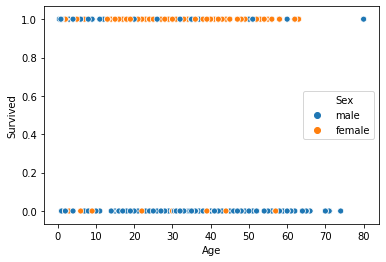

In [295]:
sns.scatterplot(x='Age',y='Survived',data=train,hue='Sex')

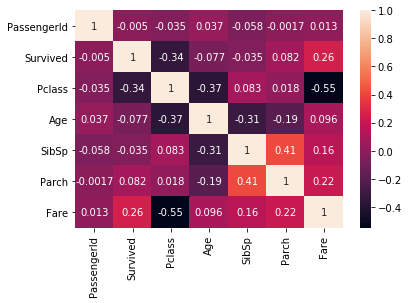

In [296]:
m=train[train.Sex=='male']
w=train[train.Sex=='female']

m_survived=m[m.Survived==1]
m_notsurvived=m[m.Survived==0]
w_survived=w[w.Survived==1]
w_notsurvived=w[w.Survived==0]

corr=train.corr()
sns.heatmap(corr,annot=True)

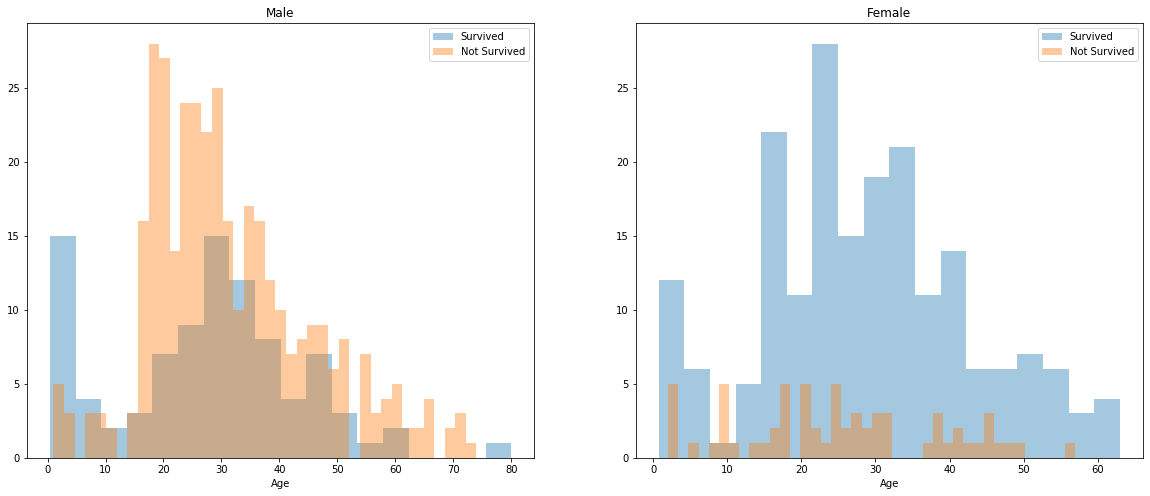

In [297]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax1=sns.distplot(m_survived.Age.dropna(),label='Survived',ax=ax[0],bins=18,kde=False)
ax1=sns.distplot(m_notsurvived.Age.dropna(),label='Not Survived',ax=ax[0],bins=40,kde=False)
ax1.set_title('Male')
ax1.legend()
ax2=sns.distplot(w_survived.Age.dropna(),label='Survived',ax=ax[1],bins=18,kde=False)
ax2=sns.distplot(w_notsurvived.Age.dropna(),label='Not Survived',ax=ax[1],bins=40,kde=False)
ax2.set_title('Female')
ax2.legend()

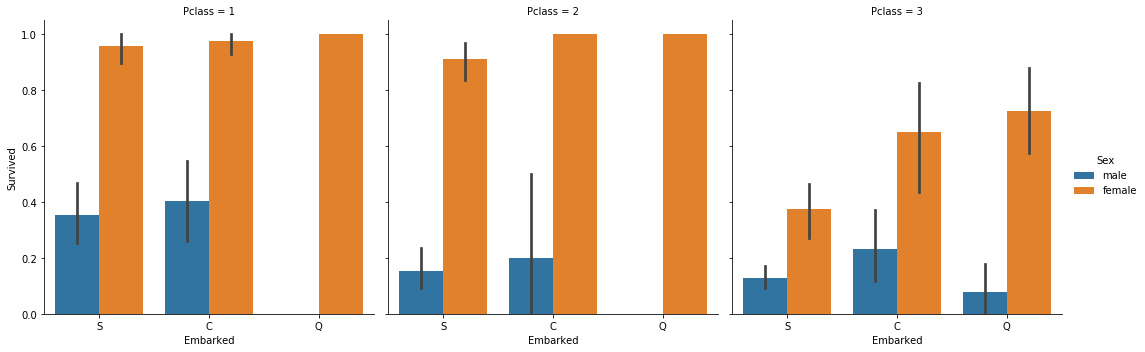

In [298]:
sns.catplot(data=train,x='Embarked',y='Survived',col='Pclass',hue='Sex',kind='bar')


C:\Users\tanma\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\tanma\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tanma\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


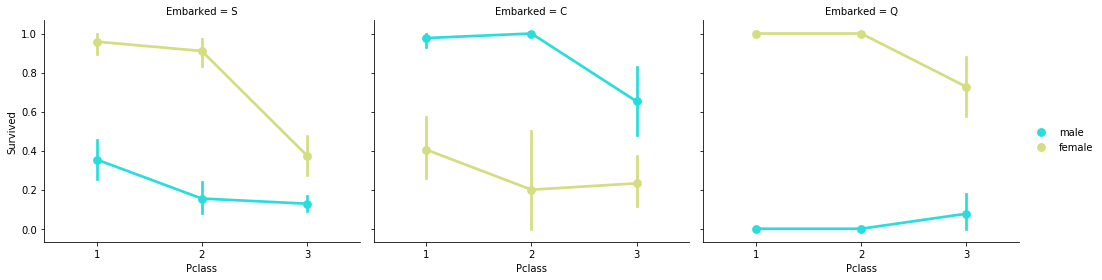

In [299]:
f=sns.FacetGrid(train,col='Embarked',size=4,aspect=1.2)
f.map(sns.pointplot,'Pclass','Survived','Sex',palette='rainbow')
f.add_legend()

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


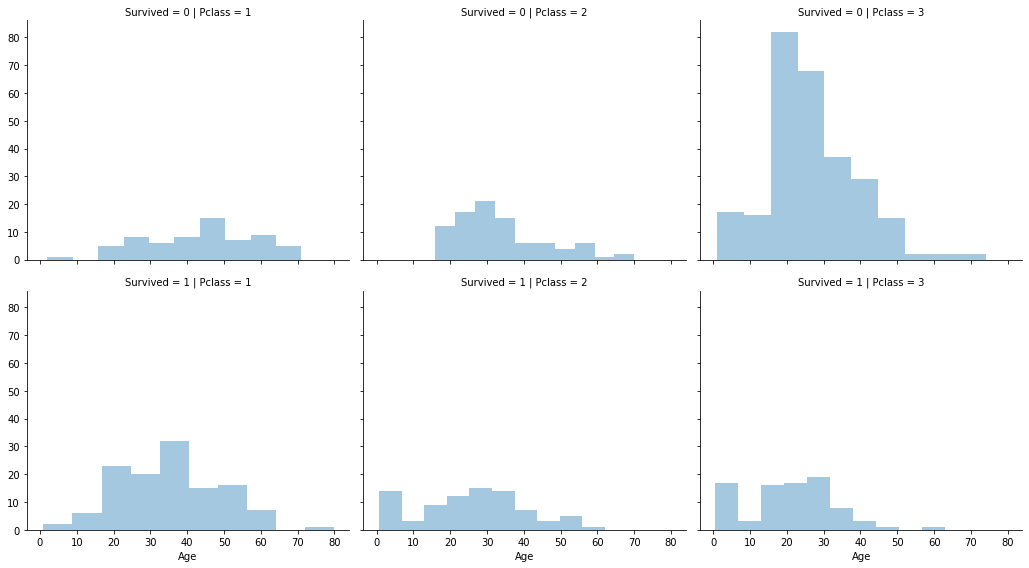

In [300]:
grid=sns.FacetGrid(train,col='Pclass',row='Survived',size=4,aspect=1.2)
grid.map(sns.distplot,'Age',bins=10,kde=False)

In [301]:
test['Survived']=-999

In [302]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [303]:
test.shape

(418, 12)

In [304]:
train.shape

(891, 12)

In [305]:
data=pd.concat([train,test],axis=0,)

In [306]:
data.shape

(1309, 12)

In [307]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [308]:
data['relatives']=data.SibSp+data.Parch

In [309]:
data.loc[data.relatives>0,'alone']=0
data.loc[data.relatives==0,'alone']=1
data.alone=data.alone.astype(int)

In [310]:
data.shape

(1309, 14)

In [311]:
data.shape

(1309, 14)

In [312]:
train=data[data.Survived!=-999]
test=data[data.Survived==-999]

In [313]:
print(train.shape,test.shape)

(891, 14) (418, 14)


In [314]:
Id=train.PassengerId

In [315]:
train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
alone            0
relatives        0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [316]:
deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'N':8}
data.Cabin=data.Cabin.fillna('N0')
import re
data['deck']=data.Cabin.map(lambda x:re.compile('([a-zA-Z]+)').search(x).group())
data['deck']=data['deck'].map(deck)
data['deck']=data['deck'].fillna(0)
data['deck']=data['deck'].astype(int)
data.deck.value_counts()

8    1014
3      94
2      65
4      46
5      41
1      22
6      21
7       5
0       1
Name: deck, dtype: int64

In [317]:
data=data.drop('Cabin',axis=1)

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  relatives    1309 non-null   int64  
 12  alone        1309 non-null   int32  
 13  deck         1309 non-null   int32  
dtypes: float64(2), int32(2), int64(6), object(4)
memory usage: 143.2+ KB


In [319]:
train=data[data.Survived!=-999]
test=data[data.Survived==-999]


In [320]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
relatives        0
alone            0
deck             0
dtype: int64

In [321]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [322]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [323]:
data.Embarked=data.Embarked.fillna('S')

In [324]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
relatives        0
alone            0
deck             0
dtype: int64

In [325]:
train=data[data.Survived!=-999]
test=data[data.Survived==-999]


In [326]:
train.Age


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [327]:
print(train.Age.median(),test.Age.median())

28.0 27.0


In [328]:
train.Age=train.Age.fillna(28.0)
test.Age=train.Age.fillna(27.0)

C:\Users\tanma\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [329]:
print(train.Age.isnull().sum(),test.Age.isnull().sum())

0 0


In [330]:
train.Age=train.Age.astype(int)
test.Age=test.Age.astype(int)

In [331]:

train.Fare=train.Fare.astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Embarked     891 non-null    object
 11  relatives    891 non-null    int64 
 12  alone        891 non-null    int32 
 13  deck         891 non-null    int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 130.5+ KB


In [332]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    int32  
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
 11  relatives    418 non-null    int64  
 12  alone        418 non-null    int32  
 13  deck         418 non-null    int32  
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 44.1+ KB


In [333]:
test[test.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,deck
152,1044,-999,3,"Storey, Mr. Thomas",male,55,0,0,3701,NaN,S,0,1,8


In [334]:
m=test[(test.Embarked=='S')&(test.Pclass==3)].Fare.median()
test.Fare=test.Fare.fillna(8.05)

C:\Users\tanma\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [335]:
test.Fare.isnull().sum()

0

In [336]:
test.Fare=test.Fare.astype(int)

In [337]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Name         418 non-null    object
 4   Sex          418 non-null    object
 5   Age          418 non-null    int32 
 6   SibSp        418 non-null    int64 
 7   Parch        418 non-null    int64 
 8   Ticket       418 non-null    object
 9   Fare         418 non-null    int32 
 10  Embarked     418 non-null    object
 11  relatives    418 non-null    int64 
 12  alone        418 non-null    int32 
 13  deck         418 non-null    int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 42.5+ KB


In [338]:
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

In [339]:
d = [train,test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in d:
    dataset['name'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['name'] = dataset['name'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'rare')
    dataset['name'] = dataset['name'].replace('Mlle', 'Miss')
    dataset['name'] = dataset['name'].replace('Ms', 'Miss')
    dataset['name'] = dataset['name'].replace('Mme', 'Mrs')   
    dataset['name'] = dataset['name'].map(titles)
    dataset['name'] = dataset['name'].fillna(0)


In [340]:
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [341]:
data=pd.concat([train,test])

In [342]:
data.shape

(1309, 13)

In [343]:
data.nunique()

PassengerId    1309
Survived          3
Pclass            3
Sex               2
Age              71
SibSp             7
Parch             8
Fare             95
Embarked          3
relatives         9
alone             2
deck              9
name              5
dtype: int64

In [344]:
data=pd.get_dummies(data=data,columns=['Sex','Embarked'])

In [345]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,alone,deck,name,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,1,0,8,1.0,0,1,0,0,1
1,2,1,1,38,1,0,71,1,0,3,3.0,1,0,1,0,0
2,3,1,3,26,0,0,7,0,1,8,2.0,1,0,0,0,1
3,4,1,1,35,1,0,53,1,0,3,3.0,1,0,0,0,1
4,5,0,3,35,0,0,8,0,1,8,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-999,3,28,0,0,8,0,1,8,1.0,0,1,0,0,1
414,1306,-999,1,44,0,0,108,0,1,3,0.0,1,0,1,0,0
415,1307,-999,3,28,0,0,7,0,1,8,1.0,0,1,0,0,1
416,1308,-999,3,34,0,0,8,0,1,8,1.0,0,1,0,0,1


In [346]:
train=data[data.Survived!=-999]
test=data[data.Survived==-999]


In [347]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'relatives', 'alone', 'deck', 'name', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [348]:
test=test.drop('Survived',axis=1)

In [349]:
test.shape

(418, 15)

In [350]:
Survived=train.Survived

In [351]:
train=train.drop('Survived',axis=1)

In [352]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    int32  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    int32  
 6   relatives    891 non-null    int64  
 7   alone        891 non-null    int32  
 8   deck         891 non-null    int32  
 9   name         891 non-null    float64
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(1), int32(4), int64(5), uint8(5)
memory usage: 67.0 KB


In [353]:
train.Age.describe()

count    891.000000
mean      29.345679
std       13.028212
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [354]:
d = [train, test]
for dataset in d:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 42), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [355]:
train.Age.value_counts()

4    288
2    139
5    137
6    122
1    116
0     64
3     18
7      7
Name: Age, dtype: int64

In [356]:
d= [train,test]

for dataset in d:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [357]:
test.Age.value_counts()

4    136
2     71
5     65
1     56
6     49
0     32
3      7
7      2
Name: Age, dtype: int64

In [358]:
train.shape

(891, 15)

In [359]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives',
       'alone', 'deck', 'name', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [360]:
train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives',
       'alone', 'deck', 'name', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [361]:
Y_train=Survived
test=test.drop('PassengerId',axis=1)
train=train.drop('PassengerId',axis=1)

In [362]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'alone', 'deck',
       'name', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [363]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'alone', 'deck',
       'name', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [364]:
train=pd.get_dummies(data=train,columns=['Pclass'])
test=pd.get_dummies(data=test,columns=['Pclass'])

In [365]:
train.name=train.name.astype(int)
test.name=test.name.astype(int)

In [366]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         891 non-null    int32
 1   SibSp       891 non-null    int64
 2   Parch       891 non-null    int64
 3   Fare        891 non-null    int32
 4   relatives   891 non-null    int64
 5   alone       891 non-null    int32
 6   deck        891 non-null    int32
 7   name        891 non-null    int32
 8   Sex_female  891 non-null    uint8
 9   Sex_male    891 non-null    uint8
 10  Embarked_C  891 non-null    uint8
 11  Embarked_Q  891 non-null    uint8
 12  Embarked_S  891 non-null    uint8
 13  Pclass_1    891 non-null    uint8
 14  Pclass_2    891 non-null    uint8
 15  Pclass_3    891 non-null    uint8
dtypes: int32(5), int64(3), uint8(8)
memory usage: 52.2 KB


In [367]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
rf.fit(train, Y_train)
prediction = rf.predict(test)

score=rf.score(train, Y_train)*100
print(score)

92.36812570145904


In [368]:
from sklearn.model_selection import cross_val_score
rforest = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
s=cross_val_score(rf,train,Y_train,cv=11,scoring='accuracy')
print(s)
print('mean',s.mean())
print('std',s.std())


[0.77777778 0.81481481 0.77777778 0.83950617 0.87654321 0.83950617
 0.77777778 0.80246914 0.79012346 0.86419753 0.83950617]
mean 0.8181818181818182
std 0.034152915947705795


In [369]:
randomf=RandomForestClassifier(n_estimators=100, oob_score = True)
randomf.fit(train, Y_train)
predictions= randomf.predict(test)
score=randomf.score(train,Y_train)*100
oob=(randomf.oob_score_)*100
print(score)
print(oob)



92.36812570145904
81.81818181818183


In [370]:
t=pd.read_csv('test.csv')

In [371]:
out=pd.DataFrame({'PassengerId':t.PassengerId,'Survived':predictions})

In [372]:
out.to_csv('my_submission5.csv',index=False)


In [97]:
out=pd.DataFrame({'PassengerId':id,'Survived':prediction})

In [99]:
out.to_csv('my_submission.csv',index=False)
print("Successfully submited yeah!!")

Successfully submited yeah!!


In [ ]:
id=pd.read_csv('gender_submission.csv'
id=id.PassengerId